# Importando bibliotecas

In [22]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
import seaborn as sns
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import KFold
import gc

# Carregando dados

In [3]:
df=pd.read_csv("./raw/train.csv")

In [4]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
df.shape

(188533, 13)

In [6]:
df = df.drop(columns=['id'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [8]:
df.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

# Checando distribuição dos dados nas características categóricas

In [9]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

### Average Prince By car Brand - Barplot

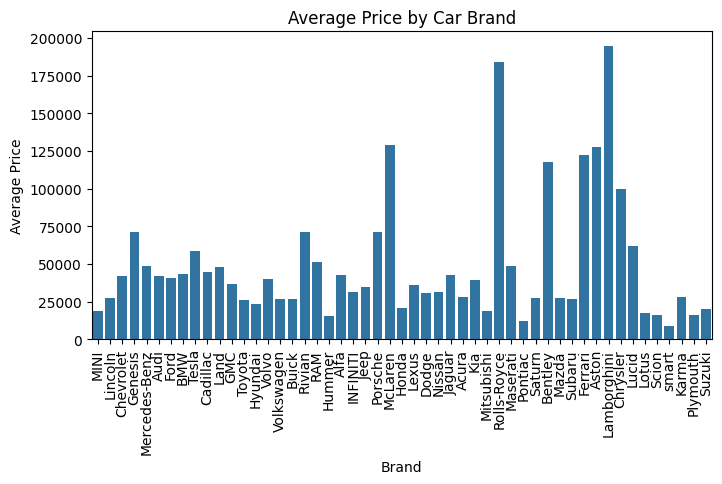

In [32]:
plt.figure(figsize=(8, 4))
sns.barplot(x='brand', y='price', data=df[:10000], errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  
plt.show()

### Average Price By Transmission Type - Boxplot

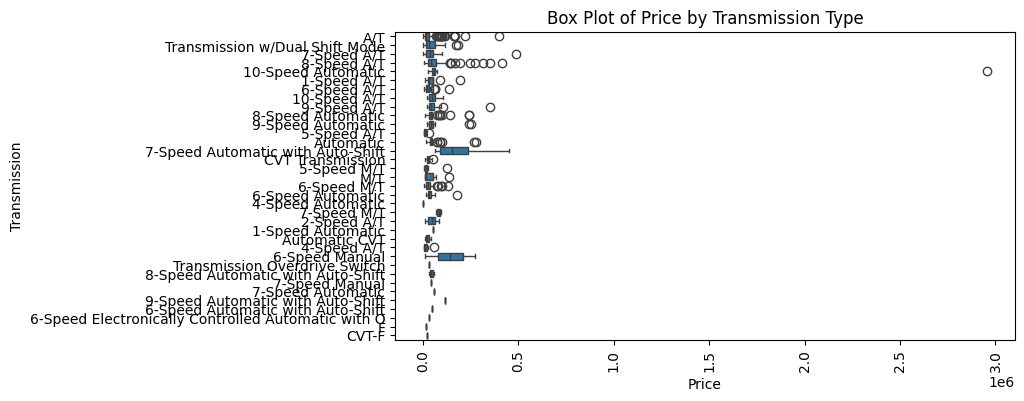

In [31]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='price', y='transmission', data=df[:1000],orient='h')
plt.title('Box Plot of Price by Transmission Type')
plt.xlabel('Price')
plt.ylabel('Transmission')
plt.xticks(rotation=90) 
plt.show()

### Average Price By Accident History

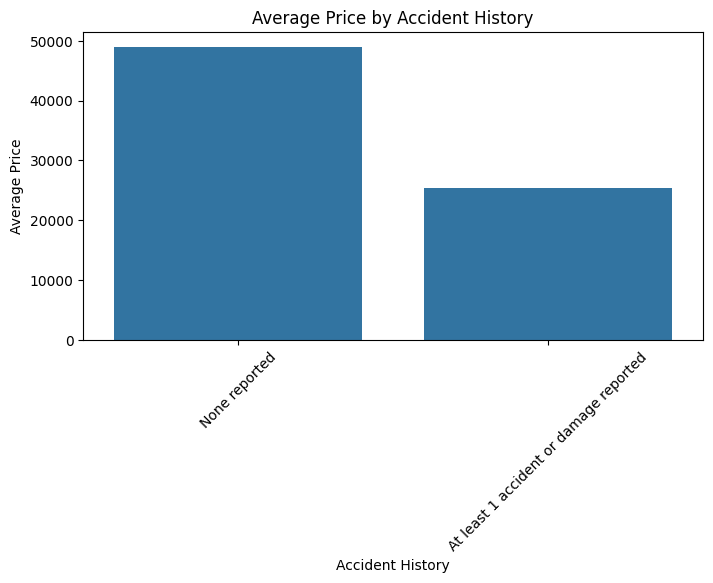

In [30]:
plt.figure(figsize=(8, 4))
sns.barplot(x='accident', y='price', data=df, errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

### Count of cars by fuel type

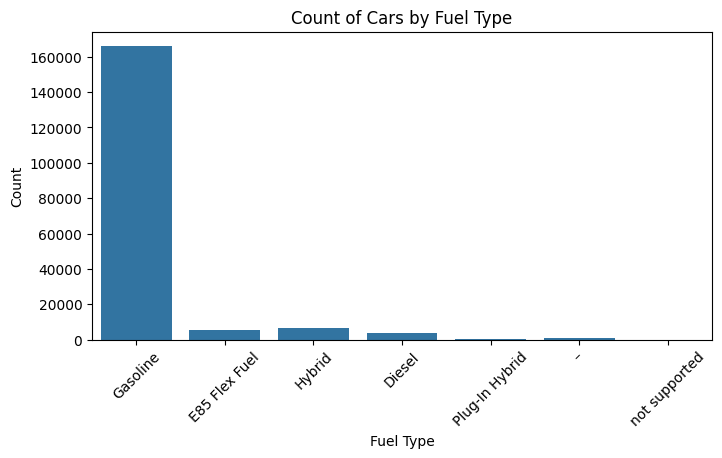

In [29]:
plt.figure(figsize=(8, 4))
sns.countplot(x='fuel_type', data=df)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Count of cars by transmission type

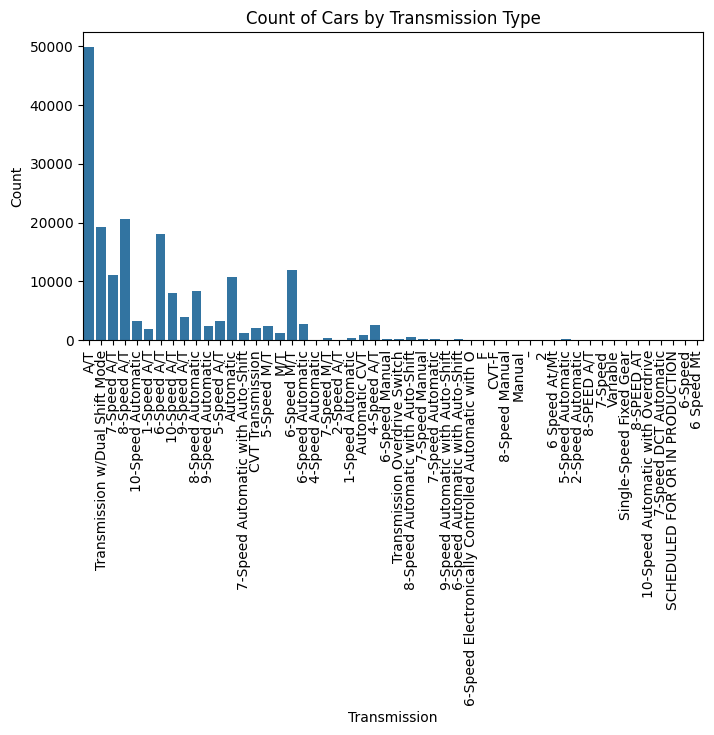

In [28]:
plt.figure(figsize=(8, 4))
sns.countplot(x='transmission', data=df)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Count of unique values in categorical columns

In [23]:
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

brand: 57 unique values
model: 1897 unique values
fuel_type: 7 unique values
engine: 1117 unique values
transmission: 52 unique values
ext_col: 319 unique values
int_col: 156 unique values
accident: 2 unique values
clean_title: 1 unique values


49850

# EDA - Análise exploratória dos dados

In [ ]:
import seaborn as sns

In [35]:
df.isna().mean()

brand           0.000000
model           0.000000
model_year      0.000000
milage          0.000000
fuel_type       0.026961
engine          0.000000
transmission    0.000000
ext_col         0.000000
int_col         0.000000
accident        0.013006
clean_title     0.113609
price           0.000000
dtype: float64

In [37]:
missing_train = df.isna().mean() * 100

print("Columns in df with missing values (in percentage):")
print(missing_train[missing_train > 0])

Columns in df with missing values (in percentage):
fuel_type       2.696080
accident        1.300568
clean_title    11.360876
dtype: float64


C:\Users\Jonatan\AppData\Local\Temp\ipykernel_33972\1317771706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


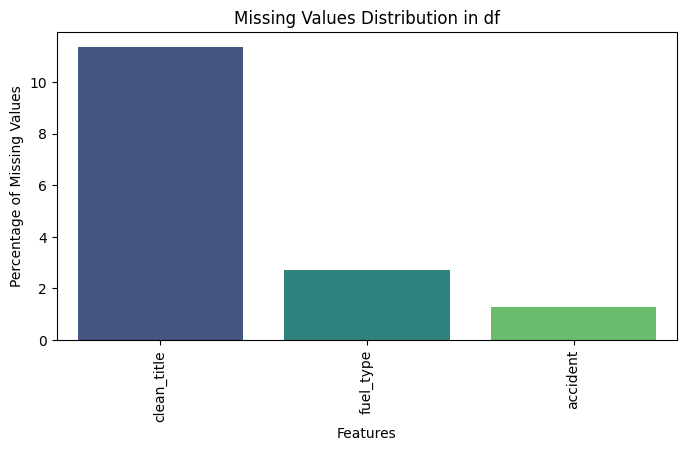

In [27]:
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values >0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Distribution in df')
plt.show()

## Matriz de correlação para características categóricas e numéricas

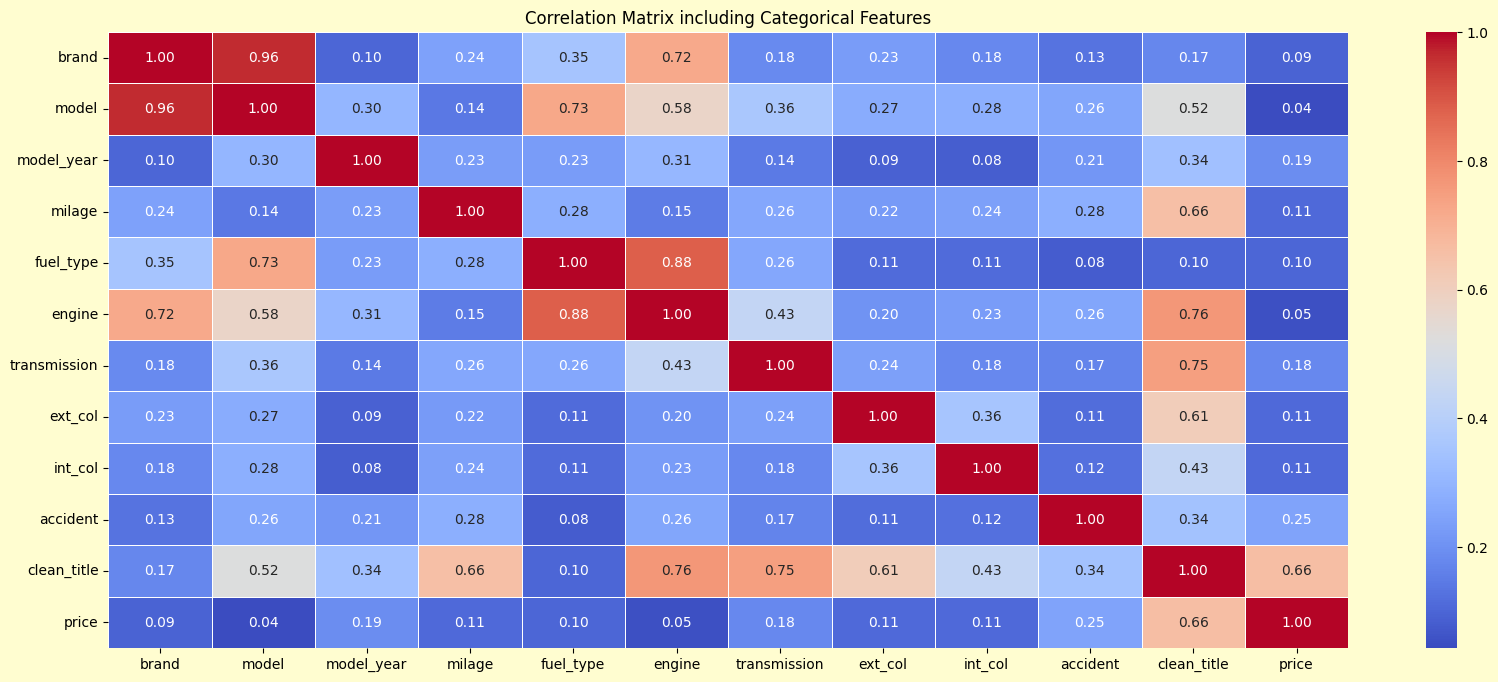

In [33]:
from dython.nominal import associations

associations_df = associations(df, nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

#### Dos dados, obtivemos os seguintes insights:
 1. Há valores faltantes, especialmente na coluna clean_title, mas que pouco influencia pois só tem um valor possível -> Vamos retirá-la do dataframe.
 2. As colunas fuel_type e accident_history possuem poucos valores faltantes, mas como são características importantes (vide matriz de correlação) -> Vamos tratá-las retirando a linha da tabela.
 3. Colunas como brand, model, transmission, etc. possuem muitos valores únicos, o que pode ser um problema para modelos de machine learning -> Vamos agrupá-las em categorias mais gerais.
 4. A coluna milage possui alguns outliers que superam o upper_bound e a o lower_bound, o que pode ser um problema para modelos de machine learning -> Vamos tratá-los retirando tais linhas da tabela.
 5. A coluna price também possui outliers, o que pode ser um problema para modelos de machine learning -> Vamos tratá-los retirando tais linhas da tabela.
 6. fuel_type e accident possuem tipos de dados diferentes. Vamos convertê-los para um tipo único antes da modelagem. 
 7. A matriz de correlação mostra que a maioria das características possuem pequena correlação com o preço -> Vamos criar novas features para capturar melhor as relações entre as variáveis.
 8. A coluna model_year pode ser transformada em uma feature categórica com mais sentido, representando a idade do veículo por meio do cálculo da diferença entre o ano atual e o ano do modelo.



# Preprocessing

### Processando os dados conforme os insights obtidos

In [ ]:
#df_train.drop(columns=['brand','clean_title'], inplace=True)  
#df_train = pd.get_dummies(df_train, columns=['engine'], drop_first=True)
#df_train['milage_per_year'] = df_train['milage'] / (2024 - df_train['model_year'])
#df_train['car_age'] = 2024 - df_train['model_year']

### Realizando o encoding das colunas categóricas e transformando em features numéricas
Obs - opções:
1. One-Hot Encoding
2. Label Encoding
3. Target Encoding
4. Binary Encoding

